# 📝 Pattern Recognition & Biometrics. Lab session 4.- Linear and nonlinear regression

By Omar Galarraga & Sonia Garcia

The objective of this lab session is to perform different regression tasks: 

* Linear (single input)
* Multiple linear (with and without regularization)
* Nonlinear with neural networks

We would like to predict the median prices of houses by California districts with respect to several quantitative features. 

Let's start by loading the California housing data and look at the description of the database:


In [42]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

* 0.1) Show the histogram of all the variables (Hint: *california_housing.frame* contains a Pandas dataframe) 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


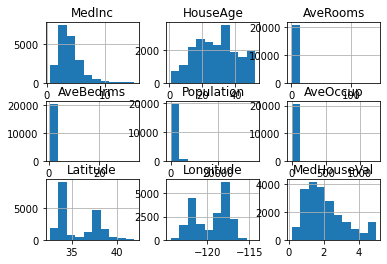

In [43]:
#Write your code here
_ = california_housing.frame.hist()
california_housing.frame

## Part I. Linear regression with a single input

Compute the correlation matrix.

* I.1) If you had to choose a unique feature to perform a linear regression, which one would you choose? Why? 

 Answer: I chose Medlnc, beacuse it related to the MedHouseVal most according to the correlation matrix.

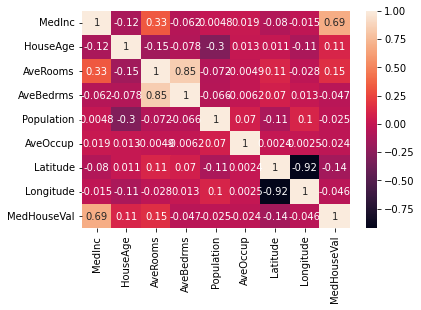

In [44]:
#Write your code here
import pandas as pd
import seaborn as sn 
import matplotlib.pyplot as plt
corr_mat = california_housing.frame.corr()
sn.heatmap(corr_mat,annot=True)
plt.show()

We would like to create a linear model $ \hat{y} = ax + b $, where $ \hat{y} $ is the prediction of the median house price and $x$ is the feature that was chosen in I.1.

* I.2) Which are the optimal values of $ a $ and $ b $? 

In [45]:
#Write your code here
import numpy as np
import matplotlib.pyplot as plt
x_train = np.array(california_housing.frame["MedInc"])
y_train = np.array(california_housing.frame["MedHouseVal"])
x_mean = np.mean(x_train)
y_mean = np.mean(y_train)
n = np.size(x_train)
Sxy = np.sum(x_train*y_train)- n*x_mean*y_mean
Sxx = np.sum(x_train*x_train)-n*x_mean*x_mean
a = Sxy/Sxx
b = y_mean-a*x_mean
print("the value of a is ",a)
print("the value of b is ",b)

the value of a is  0.4179384920189633
the value of b is  0.4508557670326767


In [46]:
y_pred = a * x_train + b
error = y_train - y_pred
se = np.sum(error**2)
SSt = np.sum((y_train - y_mean)**2)
R2 = 1- (se/SSt)
print('The 𝑅 square is', R2)


The 𝑅 square is 0.47344749180719903


* I.3) What is the value of $R^2$ (coefficient of determination)? Is this a good approximation? Please comment.
* I.4) Plot the regression curve over a scatter plot of the target with respect to the input

Text(0, 0.5, 'MedHouseVal')

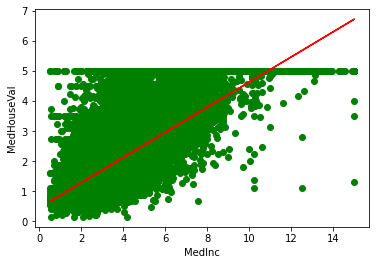

In [47]:
#Write your code here
y_pred = a * x_train + b
plt.scatter(x_train, y_train, color = 'green')
plt.plot(x_train, y_pred, color = 'red')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')


* I.5) What is the prediction root-mean-squared error (RMSE)? (in average over all the observations)

In [48]:
#Write your code here

mse = se/n
rmse = np.sqrt(mse)
print("RMSE",rmse)



RMSE 0.8373357452616916


## Part II. Multiple linear regression

Now you will have to perform linear regression using all the available features. Remember that, in order to give the same relevance to all the features, it is important to normalize the inputs before performing the regression. 

* II.1) What is the prediction error?

* II.2) What is the value of $R^2$? Is the approximation better thant with a single feature?

* II.3) What are the values of the coefficients associated to the inputs and the intercept?

In [49]:
#Write your code here
import pandas as pd
import numpy as np
from sklearn import linear_model
x = california_housing.frame.iloc[:,[0,1,2,3,4,5,6,7]]
y = np.array(california_housing.frame["MedHouseVal"])
print(x)



       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [50]:
# Create linear regression object
regr = linear_model.LinearRegression()
from sklearn.preprocessing import StandardScaler
input_preprocessor = StandardScaler()
data = input_preprocessor.fit_transform(x) #fit
print(data)
regr.fit(data,y) 


[[ 2.34476576  0.98214266  0.62855945 ... -0.04959654  1.05254828
  -1.32783522]
 [ 2.33223796 -0.60701891  0.32704136 ... -0.09251223  1.04318455
  -1.32284391]
 [ 1.7826994   1.85618152  1.15562047 ... -0.02584253  1.03850269
  -1.33282653]
 ...
 [-1.14259331 -0.92485123 -0.09031802 ... -0.0717345   1.77823747
  -0.8237132 ]
 [-1.05458292 -0.84539315 -0.04021111 ... -0.09122515  1.77823747
  -0.87362627]
 [-0.78012947 -1.00430931 -0.07044252 ... -0.04368215  1.75014627
  -0.83369581]]


LinearRegression()

In [51]:
y_pred = regr.predict(x)
error = y_pred - y
print('prediction error is ', error)

prediction error is  [78.54471501 67.93822374 78.88151792 ... 68.95339364 70.56259677
 67.78355841]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [52]:
#II.2
R2 = regr.score(data,y)
print("R square is ", R2)


R square is  0.606232685199805


The approximation is better than a single feature.

In [53]:
#II.3
a = regr.coef_
b = regr.intercept_
print("the value of a is",a)
print("the value of b is",b)

the value of a is [ 0.8296193   0.11875165 -0.26552688  0.30569623 -0.004503   -0.03932627
 -0.89988565 -0.870541  ]
the value of b is 2.0685581690891386


We will now introduce regularization term, so the objective function becomes: $$ J' = J + \alpha\sum_{i}{w_i^2} $$ ($J$ corresponds to the least squares objective function)
* II.4) Which is the optimal value of the parameter $\alpha$? (Find it empirically) 
* II.5) What is the RMSE for the optimal value of $\alpha$?

In [60]:
#Write your code here
#II.4
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=[1,10,20,30,40,50,60,70,80,90,100,150,200,300,500,600]).fit(data, y)
clf.alpha_

30

In [63]:
#II.5
n = np.size(data)
y_pred =clf.predict(data)
error = y_pred - y
se = np.sum(error**2)
mse = se/n
rmse = np.sqrt(mse)
print("Ridge regression RMSE is ",rmse)

Ridge regression RMSE is  0.25602035357734304


Add polynomial features of order $o=2$ to the already available features. Compare the regression with and without regularization (RMSE and $R^2$)
* II.6) Which one gives better results? Why?  

In [70]:
#Write your code here
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
poly = PolynomialFeatures(2)
data_poly = poly.fit_transform(data)
clf = Ridge(alpha=30)
clf.fit(data_poly,y)

n = np.size(data_poly)
y_pred =clf.predict(data_poly)
error = y_pred - y
se = np.sum(error**2)
mse = se/n
rmse = np.sqrt(mse)
print("Ridge regression after polynomial RMSE is ",rmse)

Ridge regression after polynomial RMSE is  0.09696584200290612


Answer:Add polynomial features is better 

## Part III. Nonlinear regression with neural networks

Create and train a multilayer perceptron (MLP) with $N_{layer} = 3$ layers and $m=5$ neurons in the hidden layer.

Don't forget to normalize the data in the preprocessing stage.

In [75]:
#Write your code here
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
x = california_housing.frame.iloc[:,[0,1,2,3,4,5,6,7]]
y = np.array(california_housing.frame["MedHouseVal"])
print(x)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [76]:
from sklearn.preprocessing import StandardScaler
input_preprocessor = StandardScaler()
data = input_preprocessor.fit_transform(x) #fit
print(data)
regr = MLPRegressor(hidden_layer_sizes=(5,3 ), activation="logistic", solver="lbfgs", max_iter=500).fit(data,y) # MLP model


[[ 2.34476576  0.98214266  0.62855945 ... -0.04959654  1.05254828
  -1.32783522]
 [ 2.33223796 -0.60701891  0.32704136 ... -0.09251223  1.04318455
  -1.32284391]
 [ 1.7826994   1.85618152  1.15562047 ... -0.02584253  1.03850269
  -1.33282653]
 ...
 [-1.14259331 -0.92485123 -0.09031802 ... -0.0717345   1.77823747
  -0.8237132 ]
 [-1.05458292 -0.84539315 -0.04021111 ... -0.09122515  1.77823747
  -0.87362627]
 [-0.78012947 -1.00430931 -0.07044252 ... -0.04368215  1.75014627
  -0.83369581]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



* III.1) What are the predictions for the first ten observations?
* III.2) What is the RMSE in training?

In [78]:
#Write your code here
#III.1
y_pred = regr.predict(data[:10])
print(y_pred)

[4.03501794 4.31870928 3.83043957 3.01711644 2.57797055 2.3865676
 2.46375028 2.64752964 1.7931124  2.59533536]


In [81]:
#III.2
n = np.size(data)
y_pred =regr.predict(data)
error = y_pred - y
se = np.sum(error**2)
mse = se/n
rmse = np.sqrt(mse)
print("The RMSE in training is ",rmse)

The RMSE in training is  0.1955957140666679


Perform a K-Fold cross-validation with $K=10$ (don't forget to shuffle the data)

* III.3) What are the RMSE values for training and testing (validation)? (mean and standard deviation)

In [99]:
#Write your code here
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.metrics import mean_squared_error

data_shuffle1, data_shuffle2, target_shuffle1, target_shuffle2 = train_test_split(data, y, train_size=0.7, shuffle=True, random_state=0)

data_shuffle = np.concatenate((data_shuffle1, data_shuffle2), axis=0)
y_shuffle = np.concatenate((target_shuffle1, target_shuffle2), axis=0)
regr_1 = MLPRegressor(hidden_layer_sizes=(5,3 ), activation="logistic", solver="lbfgs", max_iter=500) # MLP model

kf = KFold(n_splits=10,shuffle=True) #K-fold
train_array = []
test_array = []
for train_index, test_index in kf.split(data_shuffle):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = data_shuffle[train_index], data_shuffle[test_index]
  y_train, y_test = y_shuffle[train_index], y_shuffle[test_index]
  regr_1.fit(X_train,y_train)
  train_pred = regr_1.predict(X_train)
  test_pred = regr_1.predict(X_test)
  train_n = np.size(X_train)
  test_n = np.size(X_test)

  train_error = train_pred - y_train # y_train = train label(0.9)
  test_error = test_pred - y_test # y_test = test label(0.1)
  se_train = np.sum(train_error**2)
  se_test = np.sum(test_error**2)
  mse_train = se_train/train_n
  mse_test = se_test/test_n
  train_rmse = np.sqrt(mse_train)
  test_rmse = np.sqrt(mse_test)

  train_array.append(train_rmse)
  test_array.append(test_rmse)



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

In [103]:
print("The mean of the  RMSE in train sets is",np.array(train_array).mean()) #np.array()
print("The mean of the  RMSE in test sets is",np.array(test_array).mean())
print("The standard deviation of the RMSE in train sets is",np.array(train_array).std()) 
print("The standard deviation of the RMSE in test sets is",np.array(test_array).std())

The mean of the  RMSE in train sets is 0.1947920686739512
The mean of the  RMSE in test sets is 0.19698110225410098
The standard deviation of the RMSE in train sets is 0.0013288662490642425
The standard deviation of the RMSE in test sets is 0.004752270292155794


Optimize the number of neurons $m$ in the hidden layer (Hint: perform cross-validation for different values of $m$)

* III.4) Which is the optimal value of $m$? Why? 

In [104]:
#Write your code here
array_test = []
for i in range(1,21):
  regr_1 = MLPRegressor(hidden_layer_sizes=(5,i ), activation="logistic", solver="lbfgs", max_iter=500) # MLP model
  kf = KFold(n_splits=10,shuffle=True) #K-fold
  train_array = []
  test_array = []
  for train_index, test_index in kf.split(data_shuffle):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = data_shuffle[train_index], data_shuffle[test_index]
    y_train, y_test = y_shuffle[train_index], y_shuffle[test_index]
    regr_1.fit(X_train,y_train)
    test_pred = regr_1.predict(X_test)
    test_n = np.size(X_test)
    test_error = test_pred - y_test # y_test = test label(0.1)
    se_test = np.sum(test_error**2)
    mse_test = se_test/test_n
    test_rmse = np.sqrt(mse_test)
    test_array.append(test_rmse)
  array_test.append(np.array(test_array).mean())






/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

In [111]:
print(np.array(array_test).size)
print(array_test)
print("The optimal value of m is ",np.argmin(array_test))


20
[0.2009533412811157, 0.19777715631864903, 0.19822497498000163, 0.1967370177049849, 0.1976881209641287, 0.19501574849306869, 0.19613882709914435, 0.19617169167153764, 0.19503872576516268, 0.1951272697530498, 0.19487544787839567, 0.19629573079029033, 0.19605071059719967, 0.19553119235759933, 0.19495794004306644, 0.1969728021327768, 0.1951490622072018, 0.19628877376341652, 0.19562726746066258, 0.19634279364060275]
The optimal value of m is  10


Answer:Because it's RMSE value is the minimum.

For a 10-Fold cross-validation (with shuffle), fill the table below with the test RMSE depending on the regression method.

| Rgression method | Fold 1 | Fold 2 | Fold 3 | Fold 4 | Fold 5 | Fold 6 | Fold 7 | Fold 8 | Fold 9 | Fold 10 |
|--------------------|---------|--------|--------|-------|--------|-------|---------|--------|--------|---------|
| Linear (single)    | 0.86 |0.83  | 0.83 | 0.84 |0.82  |  0.80 | 0.82 | 0.86 |0.86  |0.83    |
| Multiple linear w/o regul.    | 0.27 |0.26  |0.26  | 0.26 | 0.25 | 0.26 | 0.24 | 0.25 | 0.27 | 0.25 |
| Multiple linear with regul.    | 0.26 | 0.26 |0.24  |0.26  | 0.26 | 0.27 | 0.25 | 0.25 | 0.25 | 0.26 |
| Polynomial w/o regul.    | 0.11 |0.74  | 0.10 | 0.10 | 0.59 | 0.10 | 0.10 | 0.09 | 0.10 | 0.10 |
| Polynomial with regul.    |0.10  |0.09  | 0.10 | 0.10 |0.12  | 0.10 |0.10  | 0.10 | 0.10 | 0.10 |
| Nonlinear with NN    | 0.20 | 0.19 | 0.19 | 0.21 | 0.20 | 0.19 | 0.19 | 0.19 | 0.19 | 0.19 |

* III.5) Which is the most adequate regression method for this problem? Justify


Polynomial with regulization is the most adequate regression method for this problem. Because it has the smallest RMSE at each fold and the value fluctuates very little. This means that it is stable.

In [115]:
# Linear 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
x_train = np.array(california_housing.frame["MedInc"]) # load x_train (data)
y_train = np.array(california_housing.frame["MedHouseVal"]) # load y_train (lable)


data_shuffle1, data_shuffle2, target_shuffle1, target_shuffle2 = train_test_split(x_train, y_train, train_size=0.7, shuffle=True, random_state=0) # split all data
data_shuffle = np.concatenate((data_shuffle1, data_shuffle2), axis=0) #concatenate
y_shuffle = np.concatenate((target_shuffle1, target_shuffle2), axis=0)#concatenate

linear =linear_model.LinearRegression() # linear model
input_preprocessor = StandardScaler() # load normalization function
data_shuffle= data_shuffle.reshapr(-1,1)
data_shuffle = input_preprocessor.fit_transform(data_shuffle) # normalization 


kf = KFold(n_splits=10,shuffle=True) #K-fold
for train_index, test_index in kf.split(data_shuffle):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = data_shuffle[train_index], data_shuffle[test_index]
    y_train, y_test = y_shuffle[train_index], y_shuffle[test_index]
    linear.fit(X_train,y_train)
    test_pred = linear.predict(X_test)
    test_n = np.size(X_test)
    test_error = test_pred - y_test # y_test = test label(0.1)
    se_test = np.sum(test_error**2)
    mse_test = se_test/test_n
    test_rmse = np.sqrt(mse_test)
    print("The rmse value of linear regression is ",test_rmse)



The rmse value of linear regression is  0.864672359819281
The rmse value of linear regression is  0.8332624733409915
The rmse value of linear regression is  0.8346761000038644
The rmse value of linear regression is  0.8439721522177198
The rmse value of linear regression is  0.8239588604240528
The rmse value of linear regression is  0.7975754617388224
The rmse value of linear regression is  0.8178185506043503
The rmse value of linear regression is  0.8656971334123912
The rmse value of linear regression is  0.8585722408611364
The rmse value of linear regression is  0.8318587872306864


In [117]:
# Multiple linear without regulization 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
x = california_housing.frame.iloc[:,[0,1,2,3,4,5,6,7]]
y = np.array(california_housing.frame["MedHouseVal"])


data_shuffle1, data_shuffle2, target_shuffle1, target_shuffle2 = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=0) # split all data
data_shuffle = np.concatenate((data_shuffle1, data_shuffle2), axis=0) #concatenate
y_shuffle = np.concatenate((target_shuffle1, target_shuffle2), axis=0)#concatenate

linear =linear_model.LinearRegression() # linear model
input_preprocessor = StandardScaler() # load normalization function
data_shuffle = input_preprocessor.fit_transform(data_shuffle) # normalization 


kf = KFold(n_splits=10,shuffle=True) #K-fold
for train_index, test_index in kf.split(data_shuffle):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = data_shuffle[train_index], data_shuffle[test_index]
    y_train, y_test = y_shuffle[train_index], y_shuffle[test_index]
    linear.fit(X_train,y_train)
    test_pred = linear.predict(X_test)
    test_n = np.size(X_test)
    test_error = test_pred - y_test # y_test = test label(0.1)
    se_test = np.sum(test_error**2)
    mse_test = se_test/test_n
    test_rmse = np.sqrt(mse_test)
    print("The rmse value of linear regression is ",test_rmse)


The rmse value of linear regression is  0.2660753548702046
The rmse value of linear regression is  0.25739390115039984
The rmse value of linear regression is  0.26204766886127984
The rmse value of linear regression is  0.2586324447014186
The rmse value of linear regression is  0.25331238533695494
The rmse value of linear regression is  0.26173875979407607
The rmse value of linear regression is  0.24413238967839768
The rmse value of linear regression is  0.24898976631886235
The rmse value of linear regression is  0.2670083664675558
The rmse value of linear regression is  0.24971730205243547


In [118]:
# Multiple linear with regulization  
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
x = california_housing.frame.iloc[:,[0,1,2,3,4,5,6,7]]
y = np.array(california_housing.frame["MedHouseVal"])


data_shuffle1, data_shuffle2, target_shuffle1, target_shuffle2 = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=0) # split all data
data_shuffle = np.concatenate((data_shuffle1, data_shuffle2), axis=0) #concatenate
y_shuffle = np.concatenate((target_shuffle1, target_shuffle2), axis=0)#concatenate

linear =Ridge(alpha=30) # linear model
input_preprocessor = StandardScaler() # load normalization function
data_shuffle = input_preprocessor.fit_transform(data_shuffle) # normalization 


kf = KFold(n_splits=10,shuffle=True) #K-fold
for train_index, test_index in kf.split(data_shuffle):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = data_shuffle[train_index], data_shuffle[test_index]
    y_train, y_test = y_shuffle[train_index], y_shuffle[test_index]
    linear.fit(X_train,y_train)
    test_pred = linear.predict(X_test)
    test_n = np.size(X_test)
    test_error = test_pred - y_test # y_test = test label(0.1)
    se_test = np.sum(test_error**2)
    mse_test = se_test/test_n
    test_rmse = np.sqrt(mse_test)
    print("The rmse value of linear regression is ",test_rmse)


The rmse value of linear regression is  0.2632192382384273
The rmse value of linear regression is  0.26310310600510134
The rmse value of linear regression is  0.24983018107244767
The rmse value of linear regression is  0.25754993980169366
The rmse value of linear regression is  0.2587480896465471
The rmse value of linear regression is  0.2705613502335191
The rmse value of linear regression is  0.2537999096681003
The rmse value of linear regression is  0.2527291538937426
The rmse value of linear regression is  0.2508448772280579
The rmse value of linear regression is  0.2554447349029987


In [119]:
# Polynomial without regulization 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
x = california_housing.frame.iloc[:,[0,1,2,3,4,5,6,7]]
y = np.array(california_housing.frame["MedHouseVal"])


data_shuffle1, data_shuffle2, target_shuffle1, target_shuffle2 = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=0) # split all data
data_shuffle = np.concatenate((data_shuffle1, data_shuffle2), axis=0) #concatenate
y_shuffle = np.concatenate((target_shuffle1, target_shuffle2), axis=0)#concatenate

linear =linear_model.LinearRegression() # linear model
input_preprocessor = StandardScaler() # load normalization function
data_shuffle = input_preprocessor.fit_transform(data_shuffle) # normalization 

poly = PolynomialFeatures(2)
data_shuffle = poly.fit_transform(data_shuffle)


kf = KFold(n_splits=10,shuffle=True) #K-fold
for train_index, test_index in kf.split(data_shuffle):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = data_shuffle[train_index], data_shuffle[test_index]
    y_train, y_test = y_shuffle[train_index], y_shuffle[test_index]
    linear.fit(X_train,y_train)
    test_pred = linear.predict(X_test)
    test_n = np.size(X_test)
    test_error = test_pred - y_test # y_test = test label(0.1)
    se_test = np.sum(test_error**2)
    mse_test = se_test/test_n
    test_rmse = np.sqrt(mse_test)
    print("The rmse value of linear regression is ",test_rmse)


The rmse value of linear regression is  0.10578015149041908
The rmse value of linear regression is  0.7446848137886859
The rmse value of linear regression is  0.09812701281126918
The rmse value of linear regression is  0.09958346197484937
The rmse value of linear regression is  0.5880315550236025
The rmse value of linear regression is  0.09896989236367203
The rmse value of linear regression is  0.1004445671454938
The rmse value of linear regression is  0.09364314112561005
The rmse value of linear regression is  0.09904041023185325
The rmse value of linear regression is  0.09936555270631779


In [120]:
# Polynomial with regulization  
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
x = california_housing.frame.iloc[:,[0,1,2,3,4,5,6,7]]
y = np.array(california_housing.frame["MedHouseVal"])


data_shuffle1, data_shuffle2, target_shuffle1, target_shuffle2 = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=0) # split all data
data_shuffle = np.concatenate((data_shuffle1, data_shuffle2), axis=0) #concatenate
y_shuffle = np.concatenate((target_shuffle1, target_shuffle2), axis=0)#concatenate

linear =Ridge(alpha=30) # linear model, regulization(Ridge)
input_preprocessor = StandardScaler() # load normalization function
data_shuffle = input_preprocessor.fit_transform(data_shuffle) # normalization 

poly = PolynomialFeatures(2)
data_shuffle = poly.fit_transform(data_shuffle)


kf = KFold(n_splits=10,shuffle=True) #K-fold
for train_index, test_index in kf.split(data_shuffle):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = data_shuffle[train_index], data_shuffle[test_index]
    y_train, y_test = y_shuffle[train_index], y_shuffle[test_index]
    linear.fit(X_train,y_train)
    test_pred = linear.predict(X_test)
    test_n = np.size(X_test)
    test_error = test_pred - y_test # y_test = test label(0.1)
    se_test = np.sum(test_error**2)
    mse_test = se_test/test_n
    test_rmse = np.sqrt(mse_test)
    print("The rmse value of linear regression is ",test_rmse)


The rmse value of linear regression is  0.09574722694449138
The rmse value of linear regression is  0.09452386007923273
The rmse value of linear regression is  0.09750574475270533
The rmse value of linear regression is  0.10035379360784494
The rmse value of linear regression is  0.1239684040705939
The rmse value of linear regression is  0.10071877689936803
The rmse value of linear regression is  0.0998879465494294
The rmse value of linear regression is  0.10141923344021193
The rmse value of linear regression is  0.09660501533548334
The rmse value of linear regression is  0.09741257089910693


In [122]:
# Nonlinear nueral networks
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
x = california_housing.frame.iloc[:,[0,1,2,3,4,5,6,7]]
y = np.array(california_housing.frame["MedHouseVal"])

data_shuffle1, data_shuffle2, target_shuffle1, target_shuffle2 = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=0) # split all data
data_shuffle = np.concatenate((data_shuffle1, data_shuffle2), axis=0) #concatenate
y_shuffle = np.concatenate((target_shuffle1, target_shuffle2), axis=0)#concatenate

regr_1 = MLPRegressor(hidden_layer_sizes=(5,10 ), activation="logistic", solver="lbfgs", max_iter=500) # MLP model
input_preprocessor = StandardScaler() # load normalization function
data_shuffle = input_preprocessor.fit_transform(data_shuffle) # normalization 

kf = KFold(n_splits=10,shuffle=True) #K-fold
for train_index, test_index in kf.split(data_shuffle):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = data_shuffle[train_index], data_shuffle[test_index]
    y_train, y_test = y_shuffle[train_index], y_shuffle[test_index]
    regr_1.fit(X_train,y_train)
    test_pred = regr_1.predict(X_test)
    test_n = np.size(X_test)
    test_error = test_pred - y_test # y_test = test label(0.1)
    se_test = np.sum(test_error**2)
    mse_test = se_test/test_n
    test_rmse = np.sqrt(mse_test)
    print("The rmse value of nonlinear regression is ",test_rmse)




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The rmse value of nonlinear regression is  0.2012173132800676


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The rmse value of nonlinear regression is  0.19140859415330053


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The rmse value of nonlinear regression is  0.19382852649810936


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The rmse value of nonlinear regression is  0.2080817026295567


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The rmse value of nonlinear regression is  0.19593373085321597


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The rmse value of nonlinear regression is  0.19289326556655095


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The rmse value of nonlinear regression is  0.1948701959762631


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The rmse value of nonlinear regression is  0.19219236629912645


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The rmse value of nonlinear regression is  0.20149741850420774
The rmse value of nonlinear regression is  0.18984135884225434


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
